In [1]:
import xarray
import pandas as pd

# Loads of useful information in xarray structure!
ueps = xarray.open_dataset('./../data/raw/brazil/UEPS_v1.nc')
ueps

<xarray.Dataset>
Dimensions:                 (Time: 52560, Height: 6, Turbine: 20, Range: 26)
Coordinates:
  * Time                    (Time) datetime64[ns] 2013-08-01 ... 2014-07-31T2...
  * Height                  (Height) float64 10.0 20.0 40.0 60.0 80.0 100.0
  * Turbine                 (Turbine) float64 1.0 2.0 3.0 4.0 ... 18.0 19.0 20.0
Dimensions without coordinates: Range
Data variables: (12/48)
    range                   (Range) float64 ...
    wind_speed              (Height, Time) float64 ...
    wind_direction          (Height, Time) float64 ...
    wind_speed_std          (Height, Time) float64 ...
    wind_direction_std      (Height, Time) float64 ...
    wind_speed_max          (Height, Time) float64 ...
    ...                      ...
    lidar_wind_direction    (Range, Time) float64 ...
    lidar_wind_speed_std    (Range, Time) float64 ...
    lidar_ws_u              (Range, Time) float64 ...
    lidar_ws_v              (Range, Time) float64 ...
    lidar_ws_w              (Range, Time) float64 ...
    lidar_availability      (Range, Time) float64 ...
Attributes:
    title:         UEBB Dataset
    long_title:    Beberibe Wind Farm (UEBB) Experimental Dataset with a full...
    comments:      Contact: yoshi@ifsc.edu.br
    institution:   Federal Univeristy of Santa Catarina, Brazil
    CreationDate:  July 2017
    CreatedBy:     Pedro Santos
    start_time:    01-Aug-2013 00:00
    end_time:      31-Jul-2014 23:50

In [2]:
# Too large of a dataset, therefore directly choose only one turbine
ueps = ueps.isel(Turbine=2)
ueps

<xarray.Dataset>
Dimensions:                 (Time: 52560, Height: 6, Range: 26)
Coordinates:
  * Time                    (Time) datetime64[ns] 2013-08-01 ... 2014-07-31T2...
  * Height                  (Height) float64 10.0 20.0 40.0 60.0 80.0 100.0
    Turbine                 float64 3.0
Dimensions without coordinates: Range
Data variables: (12/48)
    range                   (Range) float64 ...
    wind_speed              (Height, Time) float64 ...
    wind_direction          (Height, Time) float64 ...
    wind_speed_std          (Height, Time) float64 ...
    wind_direction_std      (Height, Time) float64 ...
    wind_speed_max          (Height, Time) float64 ...
    ...                      ...
    lidar_wind_direction    (Range, Time) float64 ...
    lidar_wind_speed_std    (Range, Time) float64 ...
    lidar_ws_u              (Range, Time) float64 ...
    lidar_ws_v              (Range, Time) float64 ...
    lidar_ws_w              (Range, Time) float64 ...
    lidar_availability      (Range, Time) float64 ...
Attributes:
    title:         UEBB Dataset
    long_title:    Beberibe Wind Farm (UEBB) Experimental Dataset with a full...
    comments:      Contact: yoshi@ifsc.edu.br
    institution:   Federal Univeristy of Santa Catarina, Brazil
    CreationDate:  July 2017
    CreatedBy:     Pedro Santos
    start_time:    01-Aug-2013 00:00
    end_time:      31-Jul-2014 23:50

In [3]:
ueps = ueps.to_dataframe()

In [4]:
ueps.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8199360 entries, (Timestamp('2013-08-01 00:00:00'), 10.0, 0) to (Timestamp('2014-07-31 23:50:00'), 100.0, 25)
Data columns (total 49 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Turbine                 float64
 1   range                   float64
 2   wind_speed              float64
 3   wind_direction          float64
 4   wind_speed_std          float64
 5   wind_direction_std      float64
 6   wind_speed_max          float64
 7   wind_speed_min          float64
 8   wind_speed_cube         float64
 9   air_temperature         float64
 10  relative_humidity       float64
 11  air_pressure            float64
 12  logger_temperature      float64
 13  battery_V               float64
 14  ws_u                    float64
 15  ws_v                    float64
 16  ws_w                    float64
 17  sonic_temperature       float64
 18  sonic_wind_speed        float64
 19  sonic_wind_direction    f

In [5]:
ueps.describe()

,Turbine,range,wind_speed,wind_direction,wind_speed_std,wind_direction_std,wind_speed_max,wind_speed_min,wind_speed_cube,air_temperature,...,TKE,LMO,ws_w_corrected,lidar_wind_speed,lidar_wind_direction,lidar_wind_speed_std,lidar_ws_u,lidar_ws_v,lidar_ws_w,lidar_availability
count,8199360.0,8.199360e+06,6.441708e+06,3.036046e+06,6.441708e+06,1.669902e+06,6.441708e+06,6.441708e+06,6.441708e+06,2.719808e+06,...,1.617564e+06,1.617564e+06,7.638696e+06,6.930714e+06,6.930714e+06,6.930714e+06,6.930714e+06,6.930714e+06,6.930714e+06,7.354464e+06
mean,3.0,2.528846e+02,9.355847e+00,6.456023e+01,6.533837e-01,3.498881e+00,1.097520e+01,7.493120e+00,1.073630e+03,2.990929e+02,...,6.196337e-01,6.196337e-01,9.266383e-03,9.733814e+00,8.927780e+01,8.951388e-01,-9.164974e+00,-1.521396e-01,5.647747e-02,8.500494e+01
std,0.0,1.456298e+02,2.935566e+00,3.067857e+01,2.559264e-01,2.456050e+00,3.320322e+00,2.490497e+00,8.896568e+02,8.200111e-01,...,4.610648e-01,4.610648e-01,6.919845e-02,3.137700e+00,2.332518e+01,3.319695e-01,3.319081e+00,2.915976e+00,2.047074e-01,3.154487e+01
min,3.0,4.000000e+01,2.390000e-01,-9.640000e+00,0.000000e+00,0.000000e+00,2.390000e-01,0.000000e+00,1.370000e-02,2.945100e+02,...,5.094900e-02,5.094900e-02,-5.261800e-01,2.700000e-01,0.000000e+00,0.000000e+00,-3.086000e+01,-1.726500e+01,-7.860000e+00,0.000000e+00
25%,3.0,1.200000e+02,7.429000e+00,5.028000e+01,4.660000e-01,2.591000e+00,8.700000e+00,5.941000e+00,4.163400e+02,2.985500e+02,...,3.684500e-01,3.684500e-01,-2.254600e-02,7.550000e+00,7.410000e+01,6.900000e-01,-1.145900e+01,-2.516000e+00,-3.500000e-02,9.649000e+01
50%,3.0,2.500000e+02,9.370000e+00,6.603000e+01,6.100000e-01,2.993000e+00,1.090000e+01,7.596000e+00,8.344600e+02,2.991300e+02,...,5.093800e-01,5.093800e-01,3.957850e-03,9.600000e+00,8.930000e+01,8.600000e-01,-9.118000e+00,-1.180000e-01,5.400000e-02,1.000000e+02
75%,3.0,3.800000e+02,1.141000e+01,8.710000e+01,8.000000e-01,3.554000e+00,1.328000e+01,9.210000e+00,1.506100e+03,2.996700e+02,...,7.400400e-01,7.400400e-01,4.680400e-02,1.191000e+01,1.036000e+02,1.060000e+00,-6.920000e+00,2.261000e+00,1.460000e-01,1.000000e+02
max,3.0,5.000000e+02,2.045000e+01,3.598000e+02,3.675000e+00,7.777000e+01,2.379000e+01,1.780000e+01,8.630300e+03,3.019300e+02,...,9.826500e+00,9.826500e+00,4.143100e-01,3.113000e+01,3.600000e+02,1.155000e+01,1.216400e+01,2.500200e+01,5.259000e+00,1.000000e+02


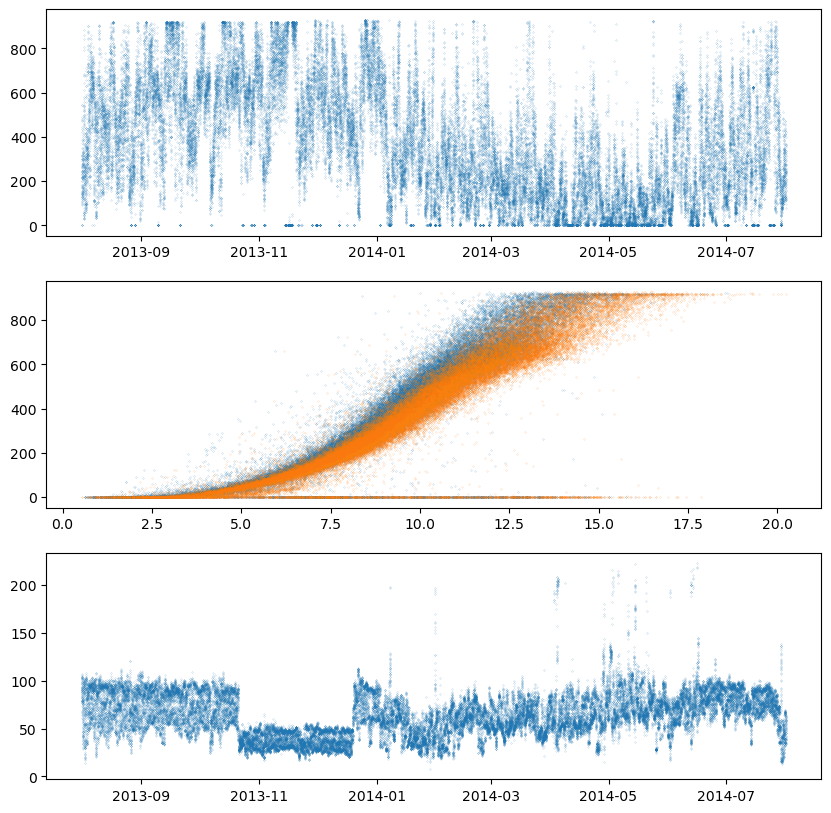

In [6]:
import sys
sys.path.append("./../src/")
import matplotlib.pyplot as plt
import data_loader as dl
import preprocessing as pp

ueps = dl.load_ueps_data(from_raw=False)
ueps = pp.preproc1_names_and_index(ueps,"ueps")


fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].scatter(ueps.index,ueps['power'], s=0.01)
ax[1].scatter(ueps['wind_speed1'],ueps['power'], s=0.01)
ax[1].scatter(ueps['wind_speed2'],ueps['power'], s=0.01)
ax[2].scatter(ueps.index, ueps["wind_direction2"], s=0.01)